## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("twitter_archive_master.csv")
df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,rating,jpg_url,img_num,breed,favorite_count,followers_count,friends_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unpredicted,39467,3200889,104
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,33819,3200889,104
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,25461,3200889,104
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,42908,3200889,104
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,41048,3200889,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,0.5,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,111,3201018,104
1982,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,None,None,0.6,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,311,3201018,104
1983,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,None,None,0.9,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,128,3201018,104
1984,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,None,None,0.7,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,132,3201018,104


In [3]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,rating,img_num,favorite_count,followers_count,friends_count
count,1.986000e+03,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1.986000e+03,1986.0
mean,7.358687e+17,12.286506,10.534240,1.169579,1.203424,8871.006042,3.200946e+06,104.0
std,6.749630e+16,41.581094,7.335369,4.075248,0.561492,12168.536175,4.481827e+01,0.0
min,6.660209e+17,0.000000,2.000000,0.000000,1.000000,81.000000,3.200799e+06,104.0
25%,6.758475e+17,10.000000,10.000000,1.000000,1.000000,1982.000000,3.200901e+06,104.0
50%,7.084132e+17,11.000000,10.000000,1.100000,1.000000,4136.000000,3.200947e+06,104.0
75%,7.879824e+17,12.000000,10.000000,1.200000,1.000000,11294.250000,3.201002e+06,104.0
max,8.924206e+17,1776.000000,170.000000,177.600000,4.000000,132810.000000,3.201018e+06,104.0


### Insights:

1. 29% of dogs doesn't have names

2. golden_retriever has the most number of dogs

3. Most dogs' stages are unknown

### Question 1: Which dog stage  has the most dogs

In [4]:
numbers_in_stage = df.groupby(['stage'])['breed'].count().reset_index()

numbers_in_stage

,stage,breed
0,None,1681
1,doggo,63
2,doggofloofer,1
3,doggopupper,9
4,doggopuppo,1
5,floofer,7
6,pupper,202
7,puppo,22


Text(0, 0.5, 'Number of dogs')

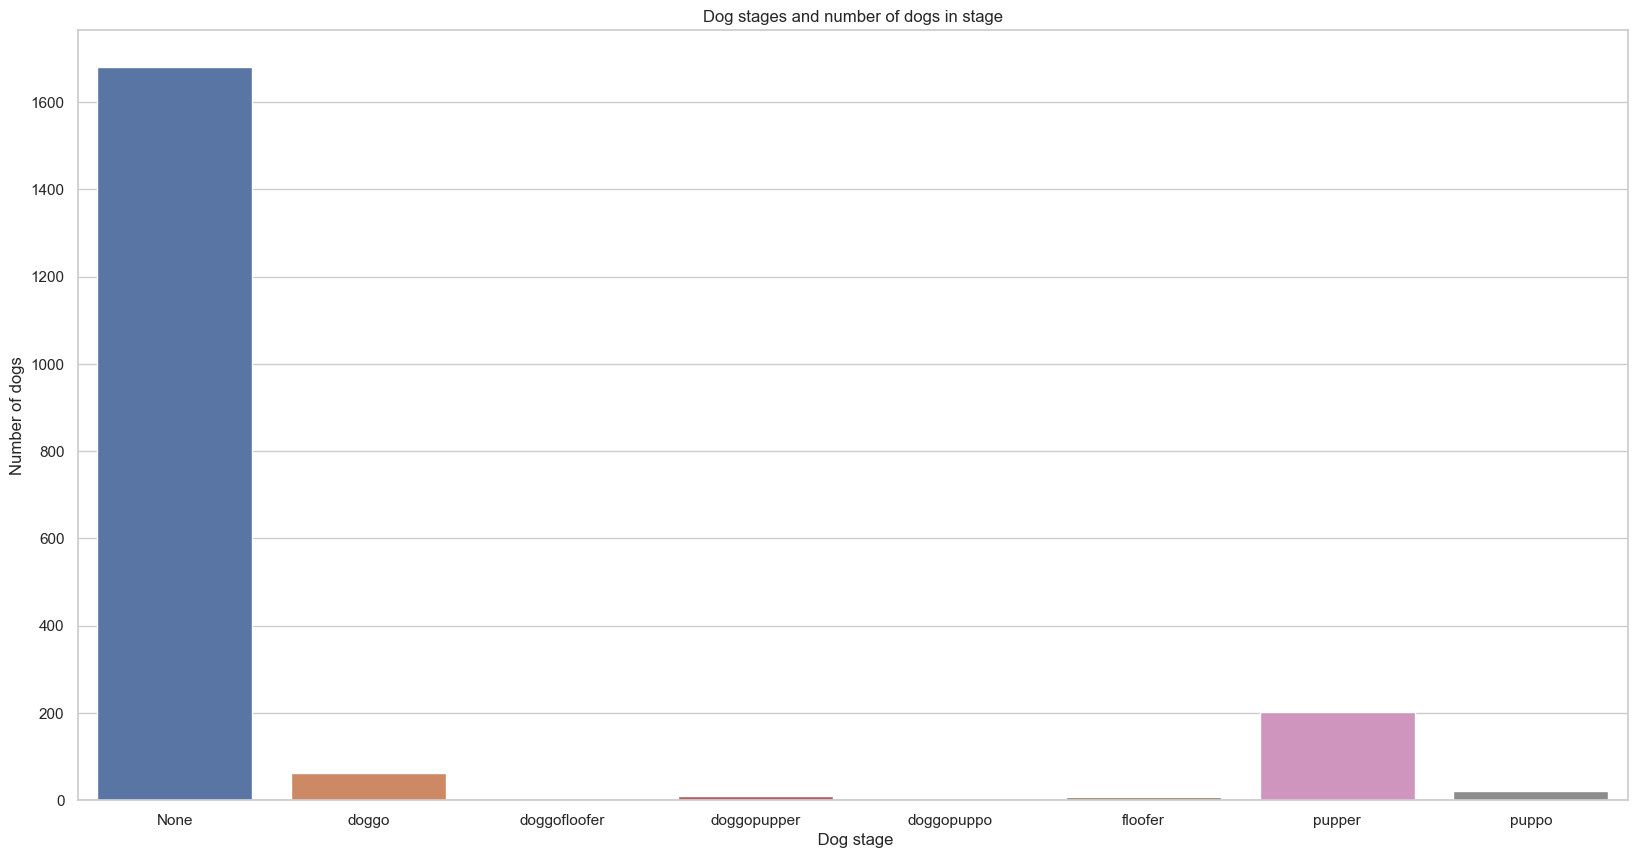

In [5]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x="stage", y="breed",ax=ax,data=numbers_in_stage,dodge=False);
plt.title('Dog stages and number of dogs in stage')

# Set x-axis label
plt.xlabel(' Dog stage')

# Set y-axis label
plt.ylabel('Number of dogs')

### Looking at bar graph

<ul>
    <li>
        The dogs that their stages are not exposed are the most tweeted
    </li>
</ul>

### Question 2: What is top beloved dogs stage

In [6]:
favorite = df.groupby(['stage']).favorite_count.sum().reset_index()
favorite

,stage,favorite_count
0,None,14193543
1,doggo,1219452
2,doggofloofer,17169
3,doggopupper,112798
4,doggopuppo,47844
5,floofer,92442
6,pupper,1459764
7,puppo,474806


In [7]:
labels = favorite.stage.unique().tolist()
sizes = favorite.groupby(['stage']).favorite_count.sum().tolist()

labels

['None',
 'doggo',
 'doggofloofer',
 'doggopupper',
 'doggopuppo',
 'floofer',
 'pupper',
 'puppo']

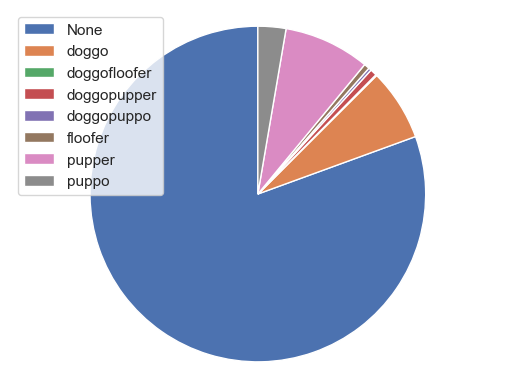

In [8]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes,shadow=False, startangle=90)

plt.legend(labels)
ax1.axis('equal')

plt.show()

### Looking at pie chart

<ul>
    <li>
        The dogs that their stages are not exposed are the most favourite tweets
    </li>
</ul>